## Handwritten Digit Recognition

In [26]:
pip install tensorflow-cpu==2.13.0

In [27]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Is GPU available:", tf.config.list_physical_devices('CPU'))

TensorFlow version: 2.13.0
Is GPU available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [28]:
# import required libraries

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# load and prepare data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train / 225.0
X_test = X_test / 225.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

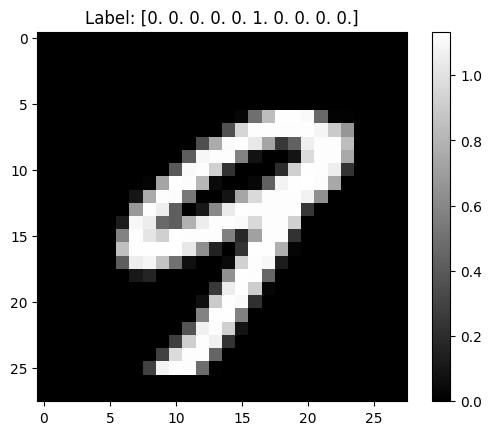

In [30]:
# Display one of the images in the training dataset
plt.imshow(X_train[1005], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.colorbar()
plt.show()

In [31]:
# Create the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),  # dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # Output layer for 10 digits (0-9)
])

In [32]:
# compile and algorithm training
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3435 - accuracy: 0.8982 - val_loss: 0.1161 - val_accuracy: 0.9667
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1671 - accuracy: 0.9506 - val_loss: 0.0876 - val_accuracy: 0.9750
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1312 - accuracy: 0.9607 - val_loss: 0.0776 - val_accuracy: 0.9777
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1075 - accuracy: 0.9673 - val_loss: 0.0740 - val_accuracy: 0.9797
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0930 - accuracy: 0.9715 - val_loss: 0.0747 - val_accuracy: 0.9783
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0856 - accuracy: 0.9731 - val_loss: 0.0771 - val_accuracy: 0.9780
Epoch 7/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0787 - accuracy: 0.9756 - val_loss: 0.0720 - val_accuracy

In [33]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy', {test_acc})

313/313 [==============================] - 1s 2ms/step - loss: 0.0746 - accuracy: 0.9785
Test accuracy {0.9785000085830688}


313/313 [==============================] - 1s 1ms/step


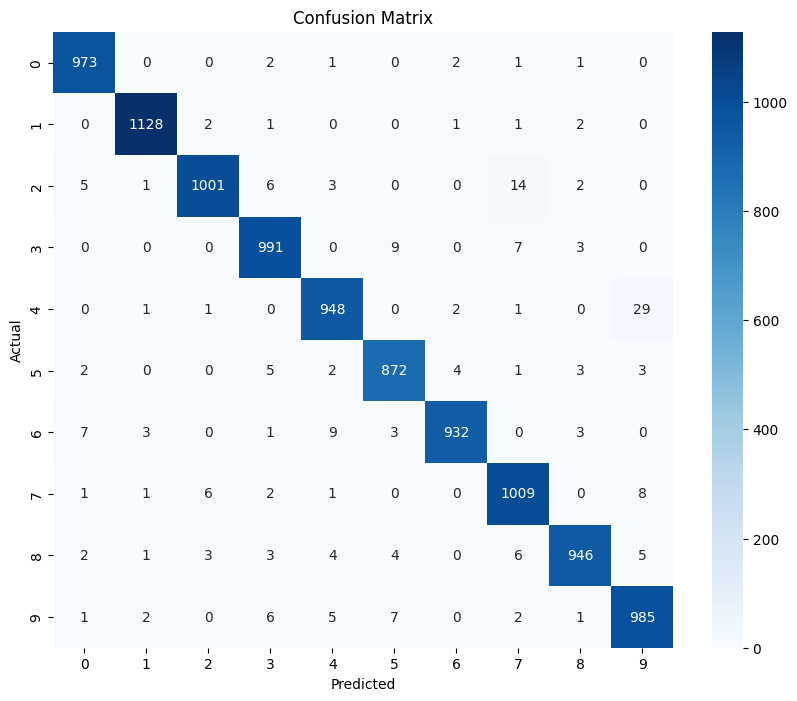

In [34]:
# the Confusion Matrix

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Interpretation:

Considering 9 on the vertical axis represents which represents the actual digit '9'

-- 1 nines were incorrectly classified as 0 <br>
-- The model never confused a '9' for a '6', which is good as these are often mirror images. <br>
-- The most common misclassification for '9' was '5', which makes sense as these digits can look similar. <br>
-- The high number in the last column (985) compared to the others indicates that the model is performing well for this digit, but there's still some room for improvement. <br>
-- The model correctly identified 985 out of 1009 actual nines (97% accuracy for the digit '9'). <br>
-- There were some confusions with '1', '3', '5', '7', and '8', but in relatively small numbers. <br>
-- To calculate the recall for the digit '9': <br>
Recall = Correct predictions / Total actual '9's <br>
Recall = 985 / 1009 = 0.976 or 97.6% <br>
This high recall indicates that the model is very good at identifying '9's when they appear, missing only about 3% of them.

In [35]:
# save the model as Hierarchical Data Format version 5 (HDF5)
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
